In [1]:
'''Conduct various evaluation on test period of a ML model
Load the model, the dataset (as class coloc_dataset_DatasetTrain, because we want Y targets for evaluation)
and run plots/evaluation on test period
'''

import os
# Filter out logs (additional) : 0 - all logs, 1 - INFO, 2 - WARNING, 3 - ERROR
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # or any {'0', '1', '2'}
import random
import numpy as np
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf

from src.data_preparation import coloc_dataset
from src.modelling import model_distri
from src.visualization import visu_mdl_distri as vmd
from src.utils import tardisml_utils
from src.utils import load_Dconfig

rootdir = tardisml_utils.get_rootdir()
# ml_dir = 'Leo/results/distri_230531-183924/ml/'
# ml_dir = 'Leo/results/distri_230814-181425/ml/'
# ml_dir = 'Leo/results/distri_240206-160617/ml/'  # trained on full dataset
# ifolder = 'Leo/results/distri_240221-124518/' ## with config

ifolder = 'Leo/results/distri_240221-165255/'  # config + 4 years training + CRPSC

file_dconfig = f'{rootdir}{ifolder}'

# --------------------------------------------------
#                 Load config and params
# --------------------------------------------------

config = load_Dconfig.DConfig(file_dconfig, verbose=1)


nfeat = config.nfeat
num_obs = config.num_obs

ml_name = config.ml_name

batch_size = config.batch_size

# --------------------------------------------------
#                 Load dataset
# --------------------------------------------------

y_as_proba = False  # True
nbins = 5  # Sea ice categories of TOPAZ5

# nfeat = 15  # exclude sia + lon
# num_obs = 1000

# Load ntrain, nval, ntest
ntrain = np.load(f'{rootdir}{config.res_dir}{config.ntrain}')
nval = np.load(f'{rootdir}{config.res_dir}{config.nval}')
ntest = np.load(f'{rootdir}{config.res_dir}{config.ntest}')


# version of TOPAZ ML-corrected to use. Is best to use TOPAZ4b ? Yes but no data after 2019 for now
# fname_tp = f'{rootdir}Leo/results/lstm_230217-153340/ml/sit_gLSTM_2011_2019.nc'
# model_tp = 'LSTM'

sc_file = f'{rootdir}{config.ml_dir}ScalerMM_{nfeat}feat.pkl'  # scaler
# var_to_exclude = ['sia', 'lon']  # 
var_to_exclude = config.var_to_exclude


# go get it in config.yaml
# d1 = datetime.datetime(2018, 10, 14)
# d2 = datetime.datetime(2018, 10, 18)
# d2 = datetime.datetime(2022, 4, 30) 

d1 = config.d1
d2 = config.d2

all_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days + 1)])
# remove non valid days
all_days = coloc_dataset.check_valid_days(all_days)

2024-02-27 13:04:49.438344: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /LUMI_CONTAINER/env1/lib:/LUMI_CONTAINER/env1/lib64:/opt/cray/pe/papi/7.0.1.1/lib64:/opt/cray/libfabric/1.15.2.0/lib64:/.singularity.d/libs
2024-02-27 13:04:54.234330: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /LUMI_CONTAINER/env1/lib:/LUMI_CONTAINER/env1/lib64:/opt/cray/pe/papi/7.0.1.1/lib64:/opt/cray/libfabric/1.15.2.0/lib64:/.singularity.d/libs
2024-02-27 13:04:54.234537: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot 

Config file found: /scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/Dconfig_2018-2022.yaml


In [2]:
# --------------------------------------------------

ds = coloc_dataset.DatasetTrain(days=all_days, config=config, rootdir=rootdir, ml_dir=config.ml_dir, y_as_proba=y_as_proba)

ds.exclude_var(var_to_exclude=var_to_exclude)

ds.check_nan()
ds.define_dataset_split(ntrain=ntrain, nval=nval, ntest=ntest)  # <<<<<<<<<<<< GIVE NTEST, NTRAIN, NVAL
ds.assemble_dataset(scaling=True, var_to_exclude=var_to_exclude)


# dsa = coloc_dataset.DatasetApply(sc_file=sc_file, var_to_exclude=var_to_exclude, rootdir=rootdir, ml_dir=ml_dir)
# dsa.import_TOPAZ4(fname_tp, model_tp)
# dsa.import_TOPAZ4(filename=None, model=None)


# dsa.make_X(day)

Importing...
	 2018-11-14
	 2018-11-15
	 2018-11-16
	 2018-11-17
	 2018-11-18
	 2018-11-19
	 2018-11-20
	 2018-11-21
	 2018-11-22
	 2018-11-23
	 2018-11-24
	 2018-11-25
	 2018-11-26
	 2018-11-27
	 2018-11-28
	 2018-11-29
	 2018-11-30
	 2018-12-01
	 2018-12-02
	 2018-12-03
	 2018-12-04
	 2018-12-05
	 2018-12-06
	 2018-12-07
	 2018-12-08
	 2018-12-09
	 2018-12-10
	 2018-12-11
	 2018-12-12
	 2018-12-13
	 2018-12-14
	 2018-12-15
	 2018-12-16
	 2018-12-17
	 2018-12-18
	 2018-12-19
	 2018-12-20
	 2018-12-21
	 2018-12-22
	 2018-12-23
	 2018-12-24
	 2018-12-25
	 2018-12-26
	 2018-12-27
	 2018-12-28
	 2018-12-29
	 2018-12-30
	 2018-12-31
	 2019-01-01
	 2019-01-02
	 2019-01-03
	 2019-01-04
	 2019-01-05
	 2019-01-06
	 2019-01-07
	 2019-01-08
	 2019-01-09
	 2019-01-10
	 2019-01-11
	 2019-01-12
	 2019-01-13
	 2019-01-14
	 2019-01-15
	 2019-01-16
	 2019-01-17
	 2019-01-18
	 2019-01-19
	 2019-01-20
	 2019-01-21
	 2019-01-22
	 2019-01-23
	 2019-01-24
	 2019-01-25
	 2019-01-26
	 2019-01-27
	 2019-01-28

	 2021-04-12
	 2021-04-13
	 2021-04-14
	 2021-04-15
	 2021-04-16
	 2021-04-17
	 2021-04-18
	 2021-04-19
	 2021-04-20
	 2021-04-21
	 2021-04-22
	 2021-04-23
	 2021-04-24
	 2021-04-25
	 2021-04-26
	 2021-04-27
	 2021-04-28
	 2021-04-29
	 2021-04-30
	 2021-09-01
	 2021-09-02
	 2021-09-03
	 2021-09-04
	 2021-09-05
	 2021-09-06
	 2021-09-07
	 2021-09-08
	 2021-09-09
	 2021-09-10
	 2021-09-12
	 2021-09-13
	 2021-09-14
	 2021-09-15
	 2021-09-16
	 2021-09-17
	 2021-09-18
	 2021-09-19
	 2021-09-20
	 2021-09-21
	 2021-09-22
	 2021-09-23
	 2021-09-24
	 2021-09-25
	 2021-09-26
	 2021-09-27
	 2021-09-28
	 2021-09-29
	 2021-09-30
	 2021-10-01
	 2021-10-02
	 2021-10-03
	 2021-10-04
	 2021-10-05
	 2021-10-06
	 2021-10-07
	 2021-10-08
	 2021-10-09
	 2021-10-10
	 2021-10-11
	 2021-10-12
	 2021-10-13
	 2021-10-14
	 2021-10-15
	 2021-10-16
	 2021-10-17
	 2021-10-18
	 2021-10-19
	 2021-10-20
	 2021-10-21
	 2021-10-22
	 2021-10-23
	 2021-10-24
	 2021-10-25
	 2021-10-26
	 2021-10-27
	 2021-10-28
	 2021-10-29

In [3]:
# --------------------------------------------------
#                 Load ML model
# --------------------------------------------------

nbins = 5  # TOPAZ5 sea ice categories
m0 = model_distri.ModelDistri(nfeat, num_obs, nbins, rootdir, config.ml_dir)

# m0.compile_model(name='pbin')
# m0.load_model_weights(ipath=f'{rootdir}{ml_dir}', ifolder_pattern='model_weights_CRPSC')
# m0.load_model_weights(ipath=f'{rootdir}{ml_dir}', ifolder_pattern='model_weights_pbin')

# m0.load_model_weights(ipath=f'{rootdir}{ml_dir}', ifolder_pattern='CRPSC')

m0.load_model_weights(ipath=f'{rootdir}{config.ml_dir}', ifolder_pattern=f'model_weights_{ml_name}')

2024-02-27 15:22:31.491975: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /LUMI_CONTAINER/env1/lib:/LUMI_CONTAINER/env1/lib64:/opt/cray/pe/papi/7.0.1.1/lib64:/opt/cray/libfabric/1.15.2.0/lib64:/.singularity.d/libs
2024-02-27 15:22:31.492016: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


Loading model...
Loaded: /scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/ml/model_weights_CRPSC


In [4]:
# --------------------------------------------------
#                 Apply ML model
# --------------------------------------------------

# Create data generators for each training/val/test set
# batch_size = 256  # 32 
test_generator = ds.make_generator(test=True, batch_size=batch_size)


# Prediction (one day)
m0.predict(test_generator)

2852/2852 [==============================] - 6s 2ms/step


In [5]:
# --------------------------------------------------
#              Evaluate test period
# --------------------------------------------------

ypred = m0.ypred
ytrue = ds.dataset['ytest']

In [7]:
from src.data_preparation import func_distriHR as fdi

In [9]:
odir= f'{rootdir}{config.fig_dir}'

In [ ]:
# ---------------------------------------------------------------------
#           Interpolate prediction on each profile to TOPAZ grid
# ---------------------------------------------------------------------

# >> funcions are in 0001_check_build_distri_to_1d.ipynb
# >>> now in /src/data_preparation/func_distriHR.py

lat = ds.sp_tp[ds.ntest, 2]  # lat
lon = ds.sp_tp[ds.ntest, 3]  # lon

# Compute indicator for each predicted/true distribution (ML/ICESat2)
kl = []
for ind in range(ds.ntest.size):
    kl += [tf.keras.backend.get_value(
        tf.keras.losses.kullback_leibler_divergence(ypred[ind], ytrue[ind]))]

kl = np.array(kl)

# gridz, gridn = fdi.interp_TPgrid(lat, lon, bs)
gridz, gridn, glat, glon = fdi.interp_TPgrid(lat, lon, kl, return_latlon=True)

In [125]:
# manually compute KL div

kl_div = []

for ind in range(ds.ntest.size):
    kl_div += [np.sum(rel_entr(ypred[ind], ytrue[ind]))]
    
kl_div = np.array(kl_div)

In [126]:
grid_kldiv, _, _, _ = fdi.interp_TPgrid(lat, lon, kl_div, return_latlon=True)

In [10]:
# Draw plot

suptitle = f'Number of distributions on test period: {ds.ntest.size}'
vmd.draw_gz_gn(gridz, gridn, glat, glon, suptitle=suptitle, odir=odir, savefig=True, showfig=False)

Saved as: /scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/figures/gridz_gridn.png


In [12]:
from importlib import reload

In [137]:
reload(vmd)

<module 'src.visualization.visu_mdl_distri' from '/users/edelleo1/tardis/tardis-ml/src/visualization/visu_mdl_distri.py'>

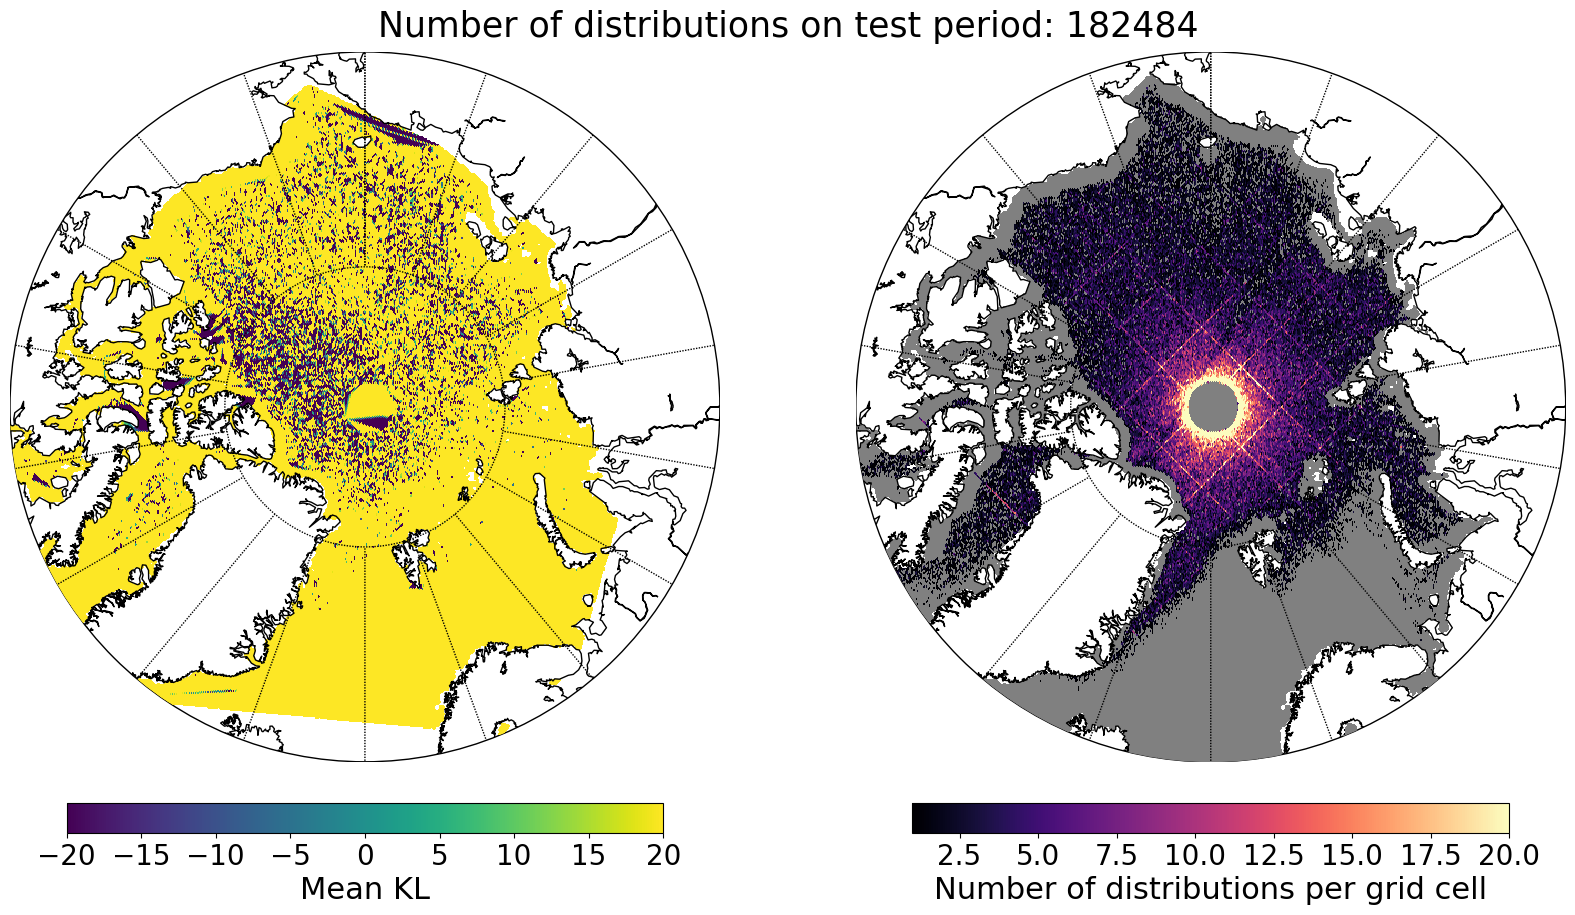

In [ ]:
vmd.draw_gz_gn(gridz, gridn, glat, glon, vmin1=-20, vmax1=20, vmin2=1, vmax2=20, suptitle=suptitle, odir=odir, savefig=False, showfig=True)

Saved as: /scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/figures/gridz_gridn_01.png


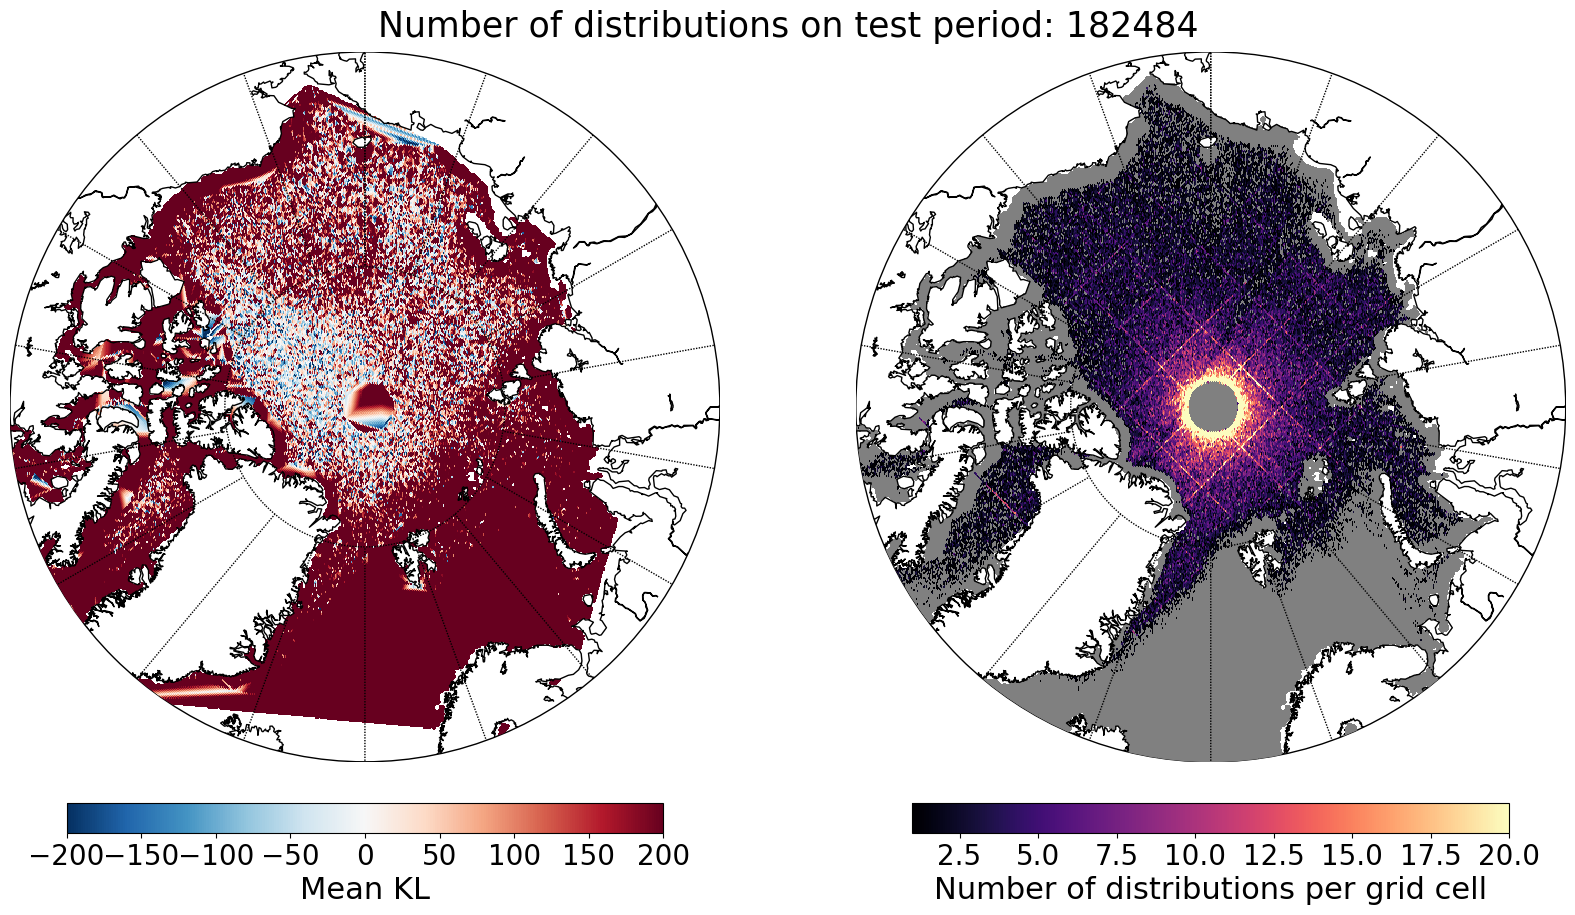

In [142]:
vmd.draw_gz_gn(gridz, gridn, glat, glon, vmin1=-200, vmax1=200, vmin2=1, vmax2=20, suptitle=suptitle, odir=odir, savefig=True, showfig=True)

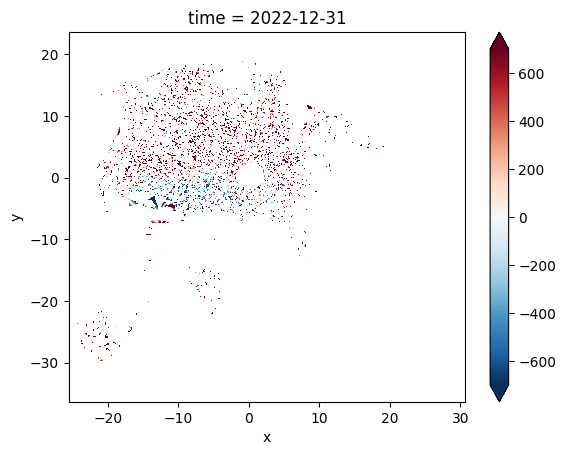

In [140]:
grid_kldiv.isel(time=0).plot(cmap = plt.get_cmap('RdBu_r'), vmin=-700, vmax=700)

In [ ]:
vmd.draw_gz_gn(grid_kldiv, gridn, glat, glon, vmin1=-700, vmax1=700, vmin2=1, vmax2=20, suptitle=suptitle, odir=odir, savefig=False, showfig=True)

In [31]:
import tensorflow_probability as tfp

In [37]:
tf.keras.losses.kullback_leibler_divergence(ypred[0], ytrue[0])

<tf.Tensor: shape=(), dtype=float64, numpy=1527.0099485488463>

In [40]:
def ecdf(a):
    '''returns x,y
    from
    https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python
    '''
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def cdf_bins(a,bins):
    pdf, bin_edges = np.histogram(a, bins=bins, density=True)
    cdf = np.cumsum(pdf*np.diff(bin_edges))
    return cdf

def compute_area(y1, y2, x):
    '''
    y1       :    cdf curve 1
    y2       :    cdf curve 2
    x        :    bins (similar for both curves)
    
    from 
    https://stackoverflow.com/questions/25439243/find-the-area-between-two-curves-plotted-in-matplotlib-fill-between-area
    '''
    z = y1 - y2
    dx = x[1:] - x[:-1]
    cross_test = np.sign(z[:-1] * z[1:])  # negative when curves cross

    x_intersect = x[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
    dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]

    areas_pos = abs(z[:-1] + z[1:]) * 0.5 * dx  # no intersection: signs of both z are same: add area of rectangle
    # intersection: add area of 2 triangles
    areas_neg = 0.5 * dx_intersect * abs(z[:-1]) + 0.5 * (dx - dx_intersect) * abs(z[1:])  

    areas = np.where(cross_test < 0, areas_neg, areas_pos)
    total_area = np.sum(areas)

    negatives = np.where(cross_test < 0)[0]
    positives = np.where(cross_test >= 0)[0]
    
    return total_area, negatives, positives, areas
    

In [93]:
idx = 1001

In [94]:
bins_true, cdf_true = ecdf(ytrue[idx])
bins_pred, cdf_pred = ecdf(ypred[idx])

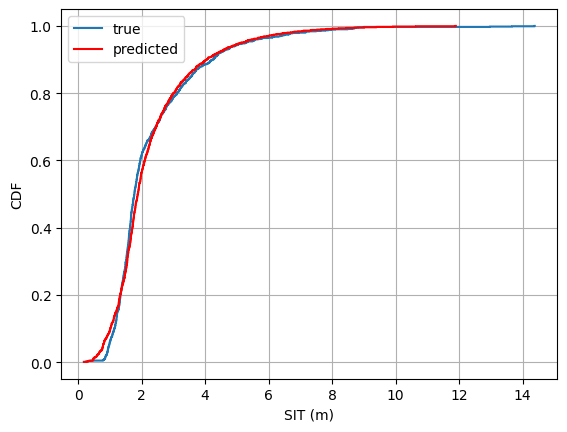

In [107]:
plt.plot(bins_true, cdf_true, drawstyle='steps-post', label='true')
plt.plot(bins_pred, cdf_pred, 'r', drawstyle='steps-post', label='predicted')
plt.ylabel('CDF')
plt.xlabel('SIT (m)')
plt.grid()

plt.legend();

In [108]:
tf.keras.losses.kullback_leibler_divergence(ypred[idx], ytrue[idx])

<tf.Tensor: shape=(), dtype=float64, numpy=-8.329484795371409>

In [109]:
tf.keras.losses.kullback_leibler_divergence(ypred[idx], ypred[idx])

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [143]:
# compute KL div manually

P = ypred[idx]
Q = ytrue[idx]

entropy = np.sum(P * np.log(P))

cross_entropy = np.sum(P * np.log(Q))

kl_div = cross_entropy - entropy

kl_div

-703.3694033690119

In [124]:
# another way of computing KL divergence manually
from scipy.special import rel_entr
np.sum(rel_entr(P, Q))

703.369389478074

In [ ]:
# Why KL div is negative? why is it different than the tf function?

In [ ]:
# ---------------------------------------------------------------------
#           Interpolate prediction on each profile to TOPAZ grid
# ---------------------------------------------------------------------

# >> funcions are in 0001_check_build_distri_to_1d.ipynb

In [1]:
# QUICK test of efficiency
# for 100 000 points

In [2]:
import numpy as np

In [24]:
import tensorflow as tf

2024-02-27 12:03:16.905118: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [44]:
ypred = np.random.random((200000,1000))

In [45]:
ytrue = np.random.random((200000,1000))

In [47]:
ypred.shape

(200000, 1000)

In [48]:
# Compute indicator for each predicted/true distribution (ML/ICESat2)
kl = []
for ind in range(ypred.shape[0]):
    kl += [tf.keras.backend.get_value(
        tf.keras.losses.kullback_leibler_divergence(ypred[ind], ytrue[ind]))]

kl = np.array(kl)

KeyboardInterrupt: 

In [72]:
# Compute indicator for each predicted/true distribution (ML/ICESat2)
kl = np.zeros((ytrue.shape[0]))

In [74]:
import time

In [75]:
t0 = time.time()

for ind in range(ypred.shape[0]):
    kl[ind] = tf.keras.backend.get_value(
        tf.keras.losses.kullback_leibler_divergence(ypred[ind], ytrue[ind]))
    
    
t1 = time.time()
tt = t1-t0
print(f'Time: {tt} s')

Time: 86.43072748184204 s


In [ ]:
t0 = time.time()

# Compute indicator for each predicted/true distribution (ML/ICESat2)
kl_l = []
for ind in range(ypred.shape[0]):
    kl_l += [tf.keras.backend.get_value(
        tf.keras.losses.kullback_leibler_divergence(ypred[ind], ytrue[ind]))]

kl_l = np.array(kl_l)

t1 = time.time()
tt = t1-t0
print(f'Time: {tt} s')

------------------------

In [25]:
lat = np.array([np.random.uniform(70, 90) for i in range(200000)])
lon = np.array([np.random.uniform(-180, 180) for i in range(200000)])
sit = np.array([np.random.uniform(0.1, 4) for i in range(200000)])

In [26]:
lat.shape

(200000,)

In [18]:
from src.data_preparation import func_distriHR as fdi

In [27]:
gridz, gridn, glat, glon = fdi.interp_TPgrid(lat, lon, sit, return_latlon=True)

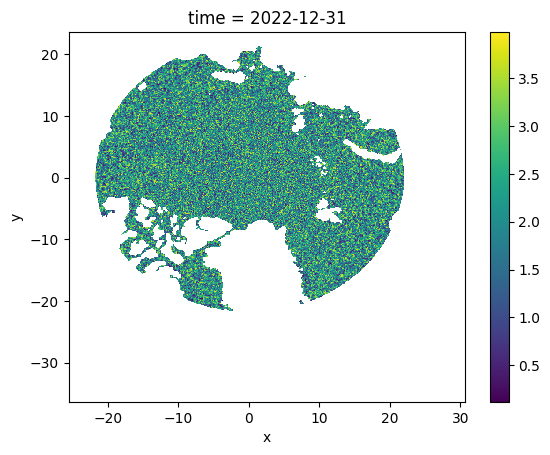

In [28]:
gridz.isel(time=0).plot()

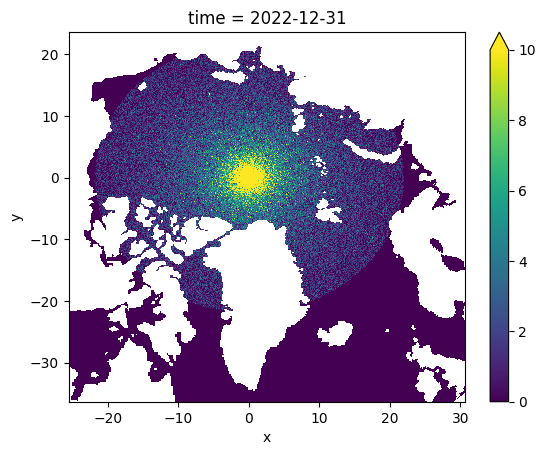

In [33]:
gridn.isel(time=0).plot(vmax=10)

In [22]:
from src.visualization import visu_mdl_distri as vmd

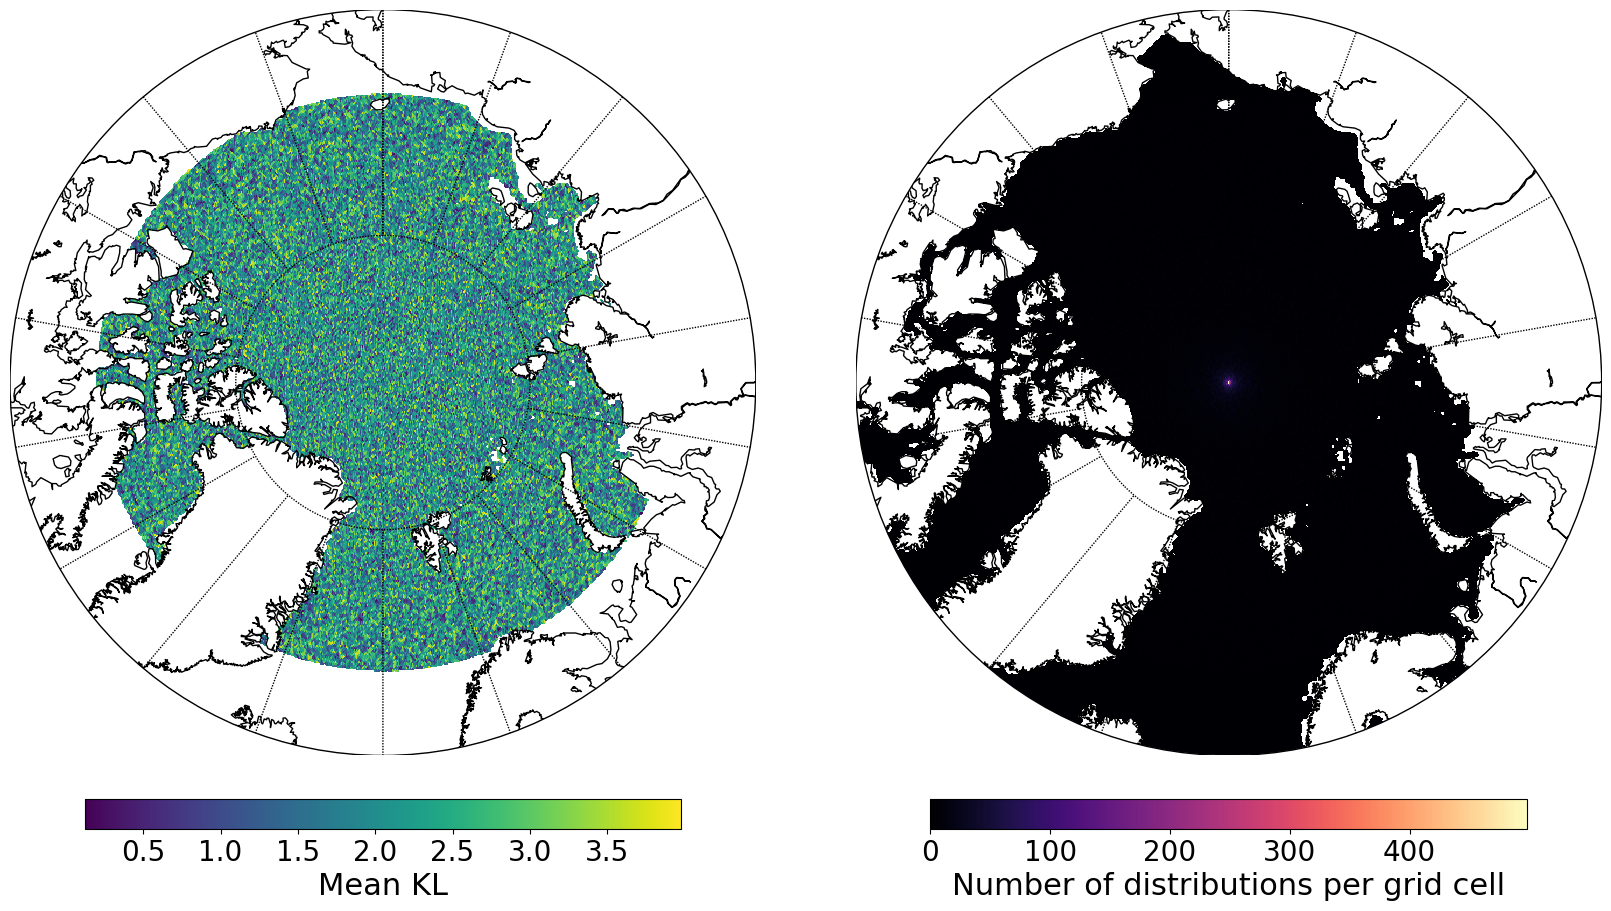

In [29]:
vmd.draw_gz_gn(gridz, gridn, glat, glon, showfig=True)